In [1]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Unit 1 Capstone: Narrative Analytics & Experimentation 
## Fatal Police Shootings in the US (2015 - 2017)

This report will explore fatal police shootings that took place in the United States from Jan 2015 to July 2017. The dataset analyzed for this report contains detailed information on 2535 fatal police shootings, compiled by The Washington Post.

The Washington Post has been tracking more than a dozen details about each killing (e.g. race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis). They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". 

This dataset only contains shootings in which a police officer, in the line of duty, shot and killed a civilian. It does not track deaths of people in police custody, fatal shootings by off-duty officers or non-shooting deaths.

More information about the dataset, as well as related datasets, can be found on its [Kaggle page](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us/data).

## 1 – Explore the Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("PoliceKillingsUS.csv", engine="python")

total_shootings_count = df.shape[0]
def label_unarmed_and_not_threat(row):
    if (row['armed'] == False) and row['threat_level'] != 'attack':
        row['unarmed_and_not_attacking'] = 'unarmed and not attacking'
    elif (row['armed'] == False) or row['threat_level'] != 'attack':
        row['unarmed_and_not_attacking'] = 'armed or attacking'
        row['unarmed_or_not_attacking'] = 'unarmed or not attacking'
    else:
        row['unarmed_and_not_attacking'] = 'armed or attacking'
        row['unarmed_or_not_attacking'] = 'armed and attacking'
    return row

df = df.apply(lambda row: label_unarmed_and_not_threat(row),axis=1)
df.loc[:,'attacking'] = df['threat_level'].apply(lambda x: 'attacking' if x == 'attack' else 'not attacking')
df.loc[:,'is_armed'] = df['armed'].apply(lambda x: 'unarmed' if x == 'unarmed' else 'armed')
df.loc[:,'has_body_camera'] = df['body_camera'].apply(lambda x: 'body camera' if x == True else 'no body camera')

def format_year_month(date):
    nums = date.split('/')
    if len(nums) == 3:
        return '20{} - {}'.format(nums[2], nums[1])
    else:
        return None
df.loc[:,'formatted_date'] = df['date'].apply(lambda x: format_year_month(x))

def label_mentally_ill_with_no_threat_or_unarmed(row):
    if (row['signs_of_mental_illness'] == True):
        if (row['threat_level'] != 'attack') or (row['unarmed_or_not_attacking'] == False):
            row['mentally_ill_unarmed_or_not_attacking'] = 'mentally ill and unarmed or non-threatening'
        else:
            row['mentally_ill_unarmed_or_not_attacking'] = 'mentally ill and armed or threatening'
    else:
        if (row['threat_level'] != 'attack') or (row['unarmed_or_not_attacking'] == False):
            row['mentally_ill_unarmed_or_not_attacking'] = 'not mentally ill and unarmed or non-threatening'
        else:
            row['mentally_ill_unarmed_or_not_attacking'] = 'not mentally ill and armed or threatening'
    return row

df = df.apply(lambda row: label_mentally_ill_with_no_threat_or_unarmed(row),axis=1)
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,unarmed_and_not_attacking,unarmed_or_not_attacking,attacking,is_armed,has_body_camera,formatted_date,mentally_ill_unarmed_or_not_attacking
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,...,attack,Not fleeing,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,mentally ill and armed or threatening
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,...,attack,Not fleeing,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,not mentally ill and armed or threatening
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,other,Not fleeing,False,armed or attacking,unarmed or not attacking,not attacking,unarmed,no body camera,2015 - 01,not mentally ill and unarmed or non-threatening
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,...,attack,Not fleeing,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,mentally ill and armed or threatening
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,...,attack,Not fleeing,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,not mentally ill and armed or threatening
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,...,attack,Not fleeing,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,not mentally ill and armed or threatening
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,...,attack,Car,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,not mentally ill and armed or threatening
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,...,attack,Not fleeing,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,not mentally ill and armed or threatening
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,...,other,Not fleeing,True,armed or attacking,unarmed or not attacking,not attacking,unarmed,body camera,2015 - 01,not mentally ill and unarmed or non-threatening
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,...,attack,Not fleeing,False,armed or attacking,armed and attacking,attacking,armed,no body camera,2015 - 01,not mentally ill and armed or threatening


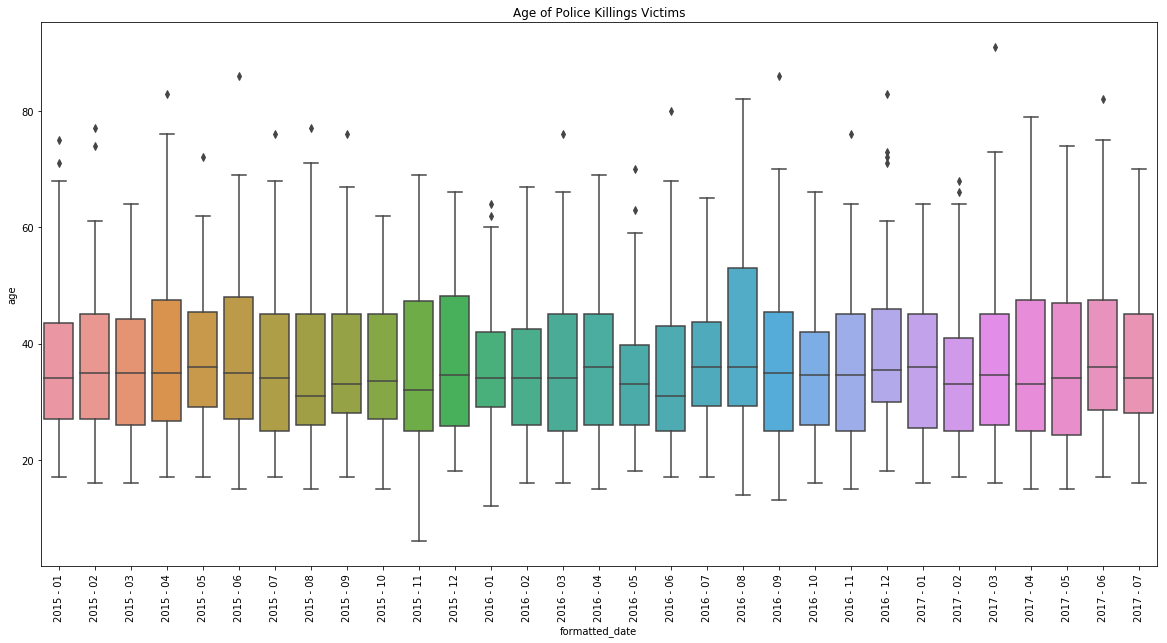

In [3]:
figure = plt.figure(figsize=(20,10))

figure.add_subplot(1, 1, 1)
g = sns.boxplot(x="formatted_date", y="age", data=df)
g.set_xticklabels(df['formatted_date'].unique(), rotation=90)
plt.title('Age of Police Killings Victims')
plt.show()

# Add more y axis tick labels

### Location
#### California, Texas, and Florida have experienced the most police killings from Jan 2, 2015 - July 31, 2017 (424, 225, and 154 each, respectively). Ohio and Oklahoma are tied for 4th highest number of police killings, with 76 each.

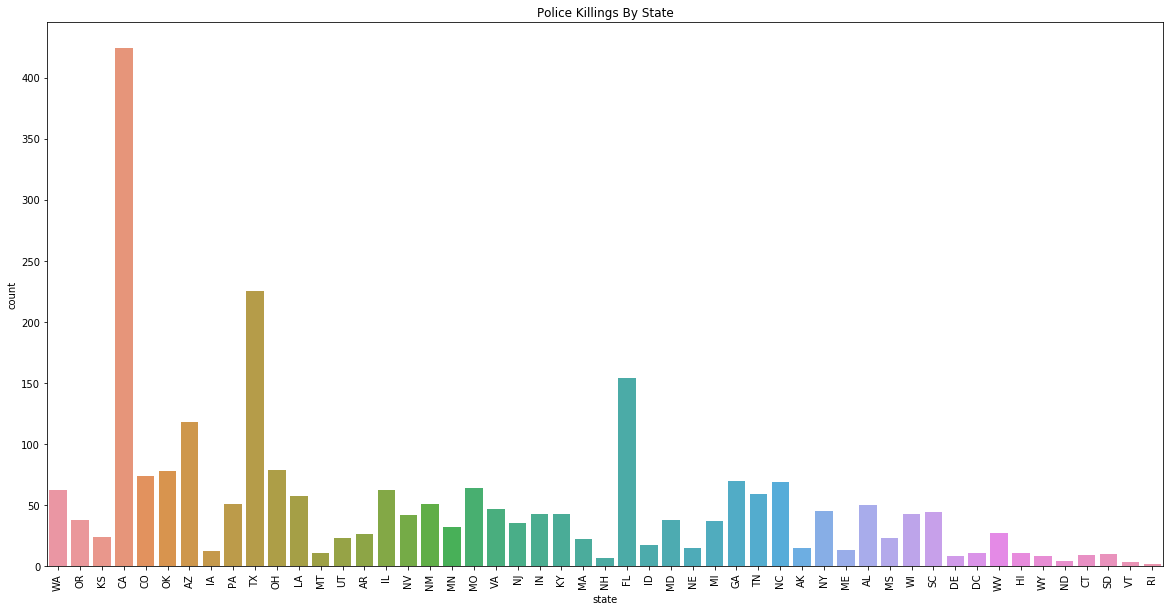

In [4]:
first_date = df['date'].unique()[0]
last_date = df['date'].unique()[-1]

figure = plt.figure(figsize=(20,10))

figure.add_subplot(1, 1, 1)
g = sns.countplot(x='state', data=df)
g.set_xticklabels(df['state'].unique(), rotation=90)
plt.title('Police Killings By State')
plt.show()

### Body Camera
#### 89.31% of all police killings were WITHOUT a body camera. 

89.31


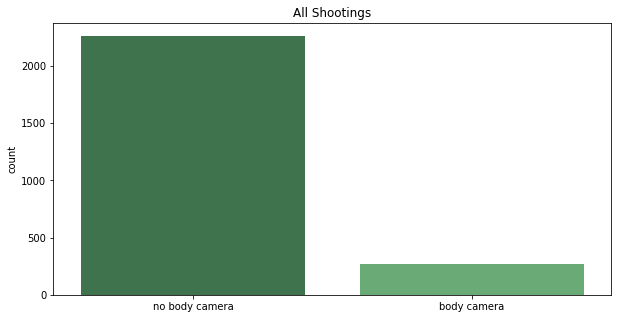

In [5]:
no_camera = df[df['body_camera'] == False]
has_camera = df[df['body_camera'] == True]
no_camera_count = no_camera.count()['id']
has_camera_count = has_camera.count()['id']

percent_no_camera = round(no_camera_count / total_shootings_count * 100, 2)

print(percent_no_camera)

figure = plt.figure(figsize=(10,5))

figure.add_subplot(1, 1, 1)
plt.title('All Shootings')
g = sns.countplot(x="has_body_camera", data=df, palette="Greens_d")
g.set_xlabel('')

plt.show()

### Body Camera vs. Unarmed Victims
#### 6.75% of all police killings had unarmed victims, and 36.45% of all police killings' victims were not attacking. 
#### 36.45% of all police killings' victims were unarmed or not attacking. 
#### No victims were both unarmed and not attacking.

6.75
36.45
36.45
0.0


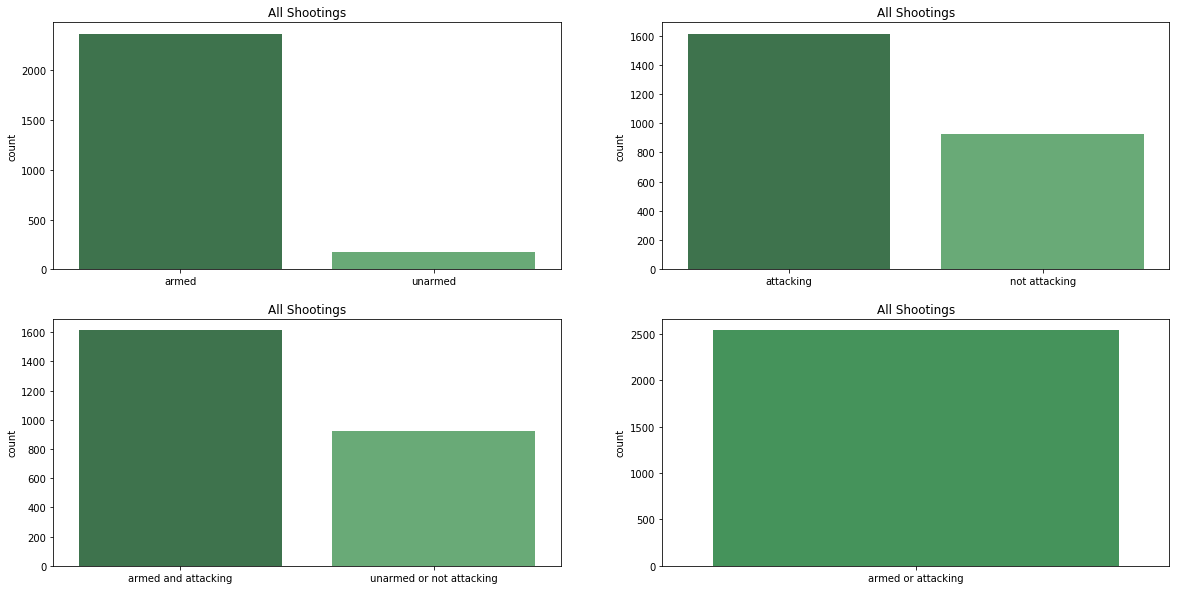

In [6]:
unarmed_count = df[df['is_armed'] == 'unarmed'].count()['id']
percent_unarmed = round(unarmed_count / total_shootings_count * 100, 2)

unarmed_or_not_attacking_count = df[df['unarmed_or_not_attacking'] == 'unarmed or not attacking'].count()['id']
percent_unarmed_or_not_attacking = round(unarmed_or_not_attacking_count / total_shootings_count * 100, 2)

not_attacking_count = df[df['attacking'] != 'attacking'].count()['id']
percent_not_attacking = round(not_attacking_count / total_shootings_count * 100, 2)

unarmed_and_not_attacking_count = df[df['unarmed_and_not_attacking'] == 'unarmed and not attacking'].count()['id']
percent_unarmed_and_not_attacking_count = round(unarmed_and_not_attacking_count / total_shootings_count * 100, 2)

print(percent_unarmed)
print(percent_unarmed_or_not_attacking)
print(percent_not_attacking)
print(percent_unarmed_and_not_attacking_count)

figure = plt.figure(figsize=(20,10))

figure.add_subplot(2, 2, 1)
plt.title('All Shootings')
g = sns.countplot(x="is_armed", data=df, palette="Greens_d")
g.set_xlabel('')

figure.add_subplot(2, 2, 2)
plt.title('All Shootings')
g = sns.countplot(x="attacking", data=df, palette="Greens_d")
g.set_xlabel('')

figure.add_subplot(2, 2, 3)
plt.title('All Shootings')
g = sns.countplot(x="unarmed_or_not_attacking", data=df, palette="Greens_d")
g.set_xlabel('')

figure.add_subplot(2, 2, 4)
plt.title('All Shootings')
g = sns.countplot(x="unarmed_and_not_attacking", data=df, palette="Greens_d")
g.set_xlabel('')

plt.show()

#### 84.21% of unarmed victims were killed WITHOUT a body camera.

84.21


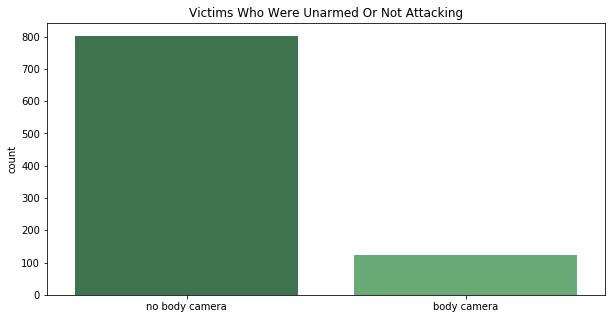

In [7]:
total_unarmed_or_not_attacking = df[df['unarmed_or_not_attacking'] == 'unarmed or not attacking']

total_unarmed = df[df['is_armed'] == 'unarmed']
total_unarmed_count = total_unarmed.count()['id']

no_camera_unarmed = no_camera[no_camera['is_armed'] == 'unarmed']
no_camera_unarmed_count = no_camera_unarmed.count()['id']

has_camera_unarmed = has_camera[has_camera['is_armed'] == 'unarmed']
has_camera_unarmed_count = has_camera_unarmed.count()['id']

percent_unarmed = round(total_unarmed_count / total_shootings_count * 100, 2)
percent_unarmed_no_camera = round(no_camera_unarmed_count / total_unarmed_count * 100, 2)
percent_unarmed_has_camera = round(has_camera_unarmed_count / total_unarmed_count * 100, 2)

print(percent_unarmed_no_camera)

figure = plt.figure(figsize=(10,5))

figure.add_subplot(1, 1, 1)
plt.title('Victims Who Were Unarmed Or Not Attacking')
g = sns.countplot(x="has_body_camera", data=total_unarmed_or_not_attacking, palette="Greens_d")
g.set_xlabel('')

plt.show()

#### 6.36% of police killings were WITHOUT a body camera had unarmed victims. 9.96% of police killings WITH a body camera had unarmed victims.

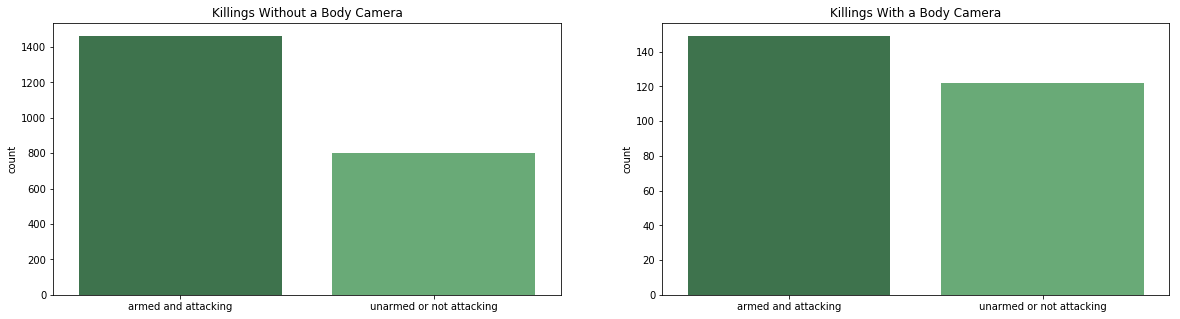

In [24]:
percent_no_camera_unarmed = round(no_camera_unarmed_count / no_camera_count * 100, 2)
percent_has_camera_unarmed = round(has_camera_unarmed_count / has_camera_count * 100, 2)

figure = plt.figure(figsize=(20,5))

# Combine bar plots

figure.add_subplot(1, 2, 1)
plt.title('Killings Without a Body Camera')
g = sns.countplot(x="unarmed_or_not_attacking", data=no_camera, palette="Greens_d")
g.set_xlabel('')

figure.add_subplot(1, 2, 2)
plt.title('Killings With a Body Camera')
g = sns.countplot(x="unarmed_or_not_attacking", data=has_camera, order=['armed and attacking', 'unarmed or not attacking'], palette="Greens_d")
g.set_xlabel('')

plt.show()

### Body Camera vs. Mentally Ill Victims
#### 9.82% of all police killings had mentally ill victims who were unarmed or non-threatening. 15.15% had mentally ill victims who were armed or threatening.

#### 26.64% of all police killings had victims who were not showing signs of mental illness, and who were unarmed or non-threatening. Almost half (48.4%) of all police shootings had victims who were not showing signs of mental illness and were either armed or threatening.

9.82 15.15 26.63 48.4


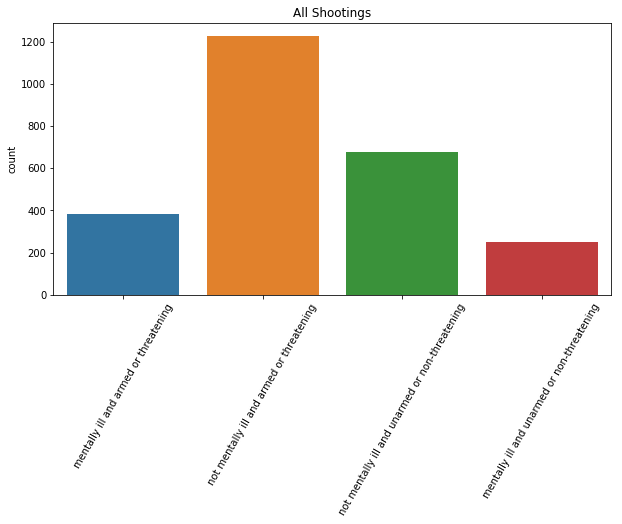

In [9]:
total_mental_nonthreatening = df[df['mentally_ill_unarmed_or_not_attacking'] == 'mentally ill and unarmed or non-threatening']
total_mental_nonthreatening_count = total_mental_nonthreatening.count()['id']

total_mental_threatening = df[df['mentally_ill_unarmed_or_not_attacking'] == 'mentally ill and armed or threatening']
total_mental_threatening_count = total_mental_threatening.count()['id']

total_not_mental_nonthreatening = df[df['mentally_ill_unarmed_or_not_attacking'] == 'not mentally ill and unarmed or non-threatening']
total_not_mental_nonthreatening_count = total_not_mental_nonthreatening.count()['id']

total_not_mental_threatening = df[df['mentally_ill_unarmed_or_not_attacking'] == 'not mentally ill and armed or threatening']
total_not_mental_threatening_count = total_not_mental_threatening.count()['id']

percent_not_mental_nonthreatening = round(total_not_mental_nonthreatening_count / total_shootings_count * 100, 2)
percent_not_mental_threatening = round(total_not_mental_threatening_count / total_shootings_count * 100, 2)
percent_mental_threatening = round(total_mental_threatening_count / total_shootings_count * 100, 2)
percent_mental_nonthreatening = round(total_mental_nonthreatening_count / total_shootings_count * 100, 2)

print(percent_mental_nonthreatening, percent_mental_threatening, percent_not_mental_nonthreatening, percent_not_mental_threatening)

figure = plt.figure(figsize=(10,5))

figure.add_subplot(1, 1, 1)
plt.title('All Shootings')
g = sns.countplot(x="mentally_ill_unarmed_or_not_attacking", data=df)
g.set_xticklabels(df['mentally_ill_unarmed_or_not_attacking'].unique(), rotation=60)
g.set_xlabel('')
plt.show()

#### 88.35% of victims who were showing signs of mental illness and either unarmed or non-threatening were shot by officers without a body camera.

88.35


/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


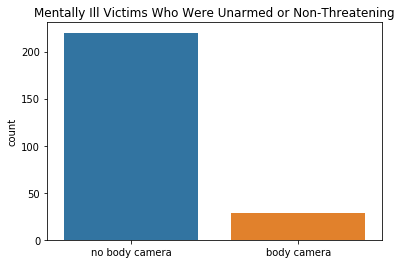

In [10]:
no_camera_mental_nonthreatening = total_mental_nonthreatening[total_mental_nonthreatening['body_camera'] == False]
no_camera_mental_nonthreatening_count = no_camera_mental_nonthreatening.count()['id']
percent_mental_nonthreatening_no_camera = round(no_camera_mental_nonthreatening_count / total_mental_nonthreatening_count * 100, 2)

print(percent_mental_nonthreatening_no_camera)

figure.add_subplot(1, 1, 1)
figure.add_subplot(1, 2, 2)
plt.title('Mentally Ill Victims Who Were Unarmed or Non-Threatening')
g = sns.countplot(x="has_body_camera", data=total_mental_nonthreatening)
g.set_xlabel('')
plt.show()

#### 9.72% of police killings WITHOUT a body camera had mentally ill victims who were either unarmed or non-threatening. 25.71% of police killings without a body camera had victims who did not show any signs of mental illness and were either unarmed or non-threatening.

#### 10.7% of police killings WITH a body camera had mentally ill victims who were either unarmed or non-threatening. 34.32% of police killings with a body camera had victims who did not show any signs of mental illness and were either unarmed or non-threatening.

9.72 25.71
10.7 34.32


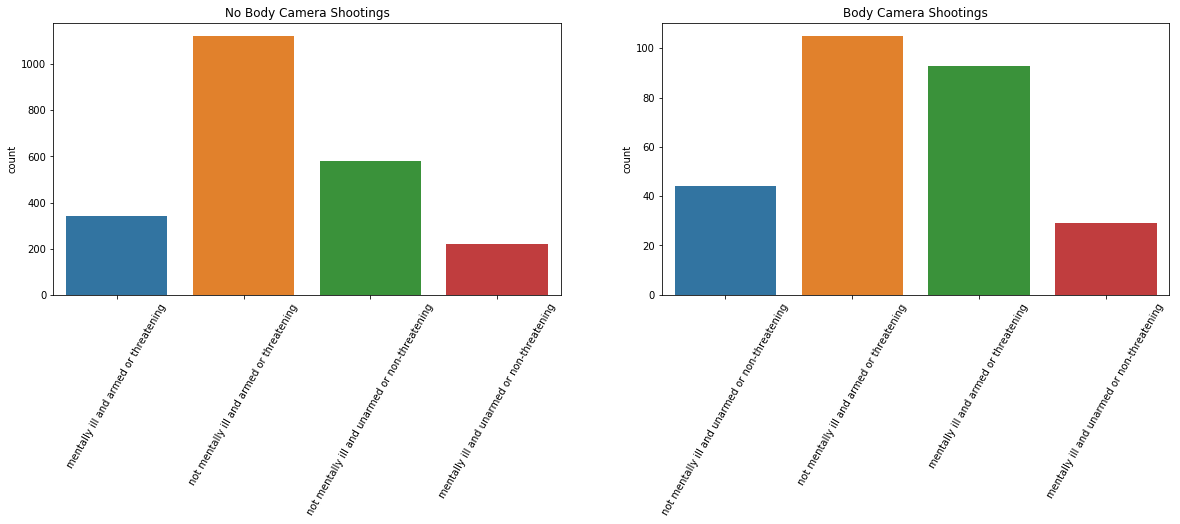

In [25]:
percent_no_camera_mental_nonthreatening = round(no_camera_mental_nonthreatening_count / no_camera_count * 100, 2)

has_camera_mental_nonthreatening = total_mental_nonthreatening[total_mental_nonthreatening['body_camera']]
has_camera_mental_nonthreatening_count = has_camera_mental_nonthreatening.count()['id']
percent_has_camera_mental_nonthreatening = round(has_camera_mental_nonthreatening_count / has_camera_count * 100, 2)

no_camera_not_mental_nonthreatening = total_not_mental_nonthreatening[total_not_mental_nonthreatening['body_camera'] == False]
no_camera_not_mental_nonthreatening_count = no_camera_not_mental_nonthreatening.count()['id']
percent_no_camera_not_mental_nonthreatening = round(no_camera_not_mental_nonthreatening_count / no_camera_count * 100, 2)

has_camera_not_mental_nonthreatening = total_not_mental_nonthreatening[total_not_mental_nonthreatening['body_camera']]
has_camera_not_mental_nonthreatening_count = has_camera_not_mental_nonthreatening.count()['id']
percent_has_camera_not_mental_nonthreatening = round(has_camera_not_mental_nonthreatening_count / has_camera_count * 100, 2)

print(percent_no_camera_mental_nonthreatening, percent_no_camera_not_mental_nonthreatening)
print(percent_has_camera_mental_nonthreatening, percent_has_camera_not_mental_nonthreatening)

figure = plt.figure(figsize=(20,5))

# Combine bar plots
# Make sure traits are in same order

figure.add_subplot(1, 2, 1)
plt.title('No Body Camera Shootings')
g = sns.countplot(x="mentally_ill_unarmed_or_not_attacking", data=no_camera)
g.set_xticklabels(no_camera['mentally_ill_unarmed_or_not_attacking'].unique(), rotation=60)
g.set_xlabel('')

figure.add_subplot(1, 2, 2)
plt.title('Body Camera Shootings')
g = sns.countplot(x="mentally_ill_unarmed_or_not_attacking", data=has_camera, order=['mentally ill and armed or threatening', 'not mentally ill and armed or threatening', 'not mentally ill and unarmed or non-threatening', 'mentally ill and unarmed or non-threatening'])
g.set_xticklabels(has_camera['mentally_ill_unarmed_or_not_attacking'].unique(), rotation=60)
g.set_xlabel('')
plt.show()

## 2 – Experimentation RFC 

### The Problem

How can police departments decrease the number of unarmed, non-threatening, and mentally ill suspects their officers kill? This is a pertinent issue to study and solve, not only because such unjustified police killings are counter to a police officer's duty to "protect and serve", but also because such incidents decrease public trust in the police, making it more difficult for competent officers to do their job well. Furthermore, a police department must divert precious time and resources in the event of a police killing to deal with negative news coverage, rather than allocating those resources to their officers and operations. 

In related studies, researchers cite insufficient training (in both de-escalation tactics and mental health awareness) as major reasons for officers shooting non-threatening unarmed and mentally ill suspects.

### Experimental Hypothesis

Enforcing that all police officers go through an increased number of mandatory de-escalation training will decrease the number of police killings of suspects who are mentally ill, unarmed, and/or non-threatening (i.e. different combinations of the above).

### Rollout & Evaluation Plan 

At first, the experiment would be limited to a single large police department, located in a state with a high number of police killings (i.e. selected from the top 3 – CA, TX, or FL). An ideal department to start with might be the Los Angeles Police Department – with its thousands of officers and location in the state with the most police shootings. 

Starting this experiment in one department with enough police officers to make statistically significant observations would ensure that 1) confounding factors like state laws, police force size, and local population would not affect the results, and 2) any change in the number of killings has the potential to be meaningful (e.g. testing a police department with 10 officers may not hold that potential). 

In this single department, we would start testing the hypothesis that police officers who go through an increased number of de-escalation training will shoot and kill fewer suspects who are mentally ill, unarmed, and/or non-threatening. Before anything can be tested, the selected police department must be split into 2 groups – one whose officers continue reporting for duty per usual, and one whose officers must undergo a predetermined and mandatory number of hours of de-escalation training before returning to duty. This will ensure that when evaluating the success of the experiment, there is a sense of what the baseline, or control, is (i.e. the shootings that would result if no changes were made), and how far the newly implemented training policy, or treatment, might deviate from that baseline (i.e. the change, or lack thereof, in shootings once additional police officer training is required).

Add details on rollout plan : https://www.crisisprevention.com/Blog/June-2011/De-escalation-Tips

Both groups of police officers are evaluated after 8 months. If there is at least 10% fewer unjustified police shootings ('unjustified' being defined as the killing of an unarmed and/or non-threatening suspect, especially those showing signs of mental illness) in the treatment group than in the control group, roll the experiment out to the rest of the state's police departments. For each new participating department, divide its officers into control and treatment groups, and repeat the experiment. Evaluate at the end of 8 months using the same criteria – did officers who underwent the new training commit at least 10% fewer 'unjustified' killings than those who did not? Is this difference statistically different (chi-squared test)?

After this second evaluation, take a view of all participating departments on a statewide level – did all officers across  CA police departments who underwent the new training commit at least 10% fewer 'unjustified' killings than those who did not? If so, roll the new action out to the next 5 states with the highest number of police killings. After another 8 months, if the 10% difference holds across officers of all the states tested so far, roll the new action out to the rest of the country. 

Provided that the 10% difference in the treatment vs. control groups still holds true after an additional 8 months on a nationwide level, keep the new de-escalation training programs in place.

### Future Expansion

The experiment could repeat the above with another related treatment – increasing the number of mandatory mental health awarenss training – and evaluating whether that also decreases the number of police killings of unarmed / non-threatening / mentally ill suspects.